<font size="+3"><strong>4.4. Beyond the Model: Data Ethics</strong></font>

In [1]:
import sqlite3
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
VimeoVideo("665414155", h="c8a3e81a05", width=600)

# Prepare Data

**Task 4.4.1:** Run the cell below to connect to the `nepal.sqlite` database.

- [What's <span id='term'>ipython-sql</span>?](../%40textbook/10-databases-sql.ipynb#ipython-sql)
- [What's a <span id='term'>Magics function</span>?](../%40textbook/10-databases-sql.ipynb#Magic-Commands)

In [2]:
%load_ext sql
%sql sqlite:////home/jovyan/nepal.sqlite

'Connected: @/home/jovyan/nepal.sqlite'

In [5]:
VimeoVideo("665415362", h="f677c48c46", width=600)

**Task 4.4.2:** Select all columns from the `household_demographics` table, limiting your results to the first five rows.

- [<span id='technique'>Write a basic query in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Building-Blocks-of-the-Basic-Query)
- [<span id='technique'>Inspect a table using a `LIMIT` clause in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Building-Blocks-of-the-Basic-Query)

In [3]:
%%sql
SELECT * FROM household_demographics
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household
101,Male,31.0,Rai,Illiterate,Rs. 10 thousand,3.0,0.0
201,Female,62.0,Rai,Illiterate,Rs. 10 thousand,6.0,0.0
301,Male,51.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,13.0,0.0
401,Male,48.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,5.0,0.0
501,Male,70.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,8.0,0.0


**Task 4.4.3:** How many observations are in the `household_demographics` table? Use the `count` command to find out.

- [<span id='technique'>Calculate the number of rows in a table using a `count` function in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Aggregating-Data) 

In [4]:
%%sql
SELECT COUNT(*) as Number_Household FROM household_demographics

 * sqlite:////home/jovyan/nepal.sqlite
Done.


Number_Household
249932


In [9]:
VimeoVideo("665415378", h="aa2b99493e", width=600)

**Task 4.4.4:** Select all columns from the `id_map` table, limiting your results to the first five rows.

- [<span id='technique'>Inspect a table using a `LIMIT` clause in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Building-Blocks-of-the-Basic-Query)

What columns does it have in common with `household_demographics` that we can use to join them?

In [5]:
%%sql
SELECT * FROM id_map
limit 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
5601,56,7,1
6301,63,7,1
9701,97,7,1
9901,99,7,1
11501,115,7,1


In [11]:
VimeoVideo("665415406", h="46a990c8f7", width=600)

**Task 4.4.5:** Create a table with all the columns from `household_demographics`, all the columns from `building_structure`, the **`vdcmun_id`** column from `id_map`, and the **`damage_grade`** column from `building_damage`. Your results should show only rows where the **`district_id`** is `4` and limit your results to the first five rows.

- [<span id='technique'>Create an alias for a column or table using the `AS` command in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#SELECT-and-FROM) 
- [<span id='technique'>Determine the unique values in a column using a `DISTINCT` function in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Aggregating-Data) 
- [<span id='technique'>Merge two tables using a `JOIN` clause in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Joining-Tables)
- [<span id='technique'>Inspect a table using a `LIMIT` clause in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Building-Blocks-of-the-Basic-Query)
- [<span id='technique'>Subset a table using a `WHERE` clause in <span id='tool'>SQL</span></span>.](../%40textbook/10-databases-sql.ipynb#Building-Blocks-of-the-Basic-Query)

In [6]:
%%sql
select h.*,

s.*,
i.vdcmun_id,
d.damage_grade

from household_demographics as h
join id_map as i on i.household_id = h.household_id
join building_structure as s on s.building_id = i.building_id
join building_damage as d on i.building_id = d.building_id
where district_id = 4
limit 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,vdcmun_id,damage_grade
16400201,Female,46.0,Chhetree,Class 5,Rs. 10-20 thousand,4.0,1.0,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",38,Grade 2
16408101,Male,66.0,Chhetree,Illiterate,Rs. 10 thousand,5.0,0.0,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",38,Grade 2
16408901,Male,54.0,Magar,Class 4,Rs. 10 thousand,5.0,1.0,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",38,Grade 2
16409801,Male,36.0,Chhetree,Class 5,Rs. 10 thousand,6.0,1.0,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",38,Grade 3
16410301,Female,39.0,Chhetree,Class 4,Rs. 10 thousand,3.0,0.0,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",38,Grade 3


## Import

In [7]:
def wrangle(db_path):
    # Connect to database
    conn = sqlite3.connect(db_path)

    # Construct query
    query = """
    select h.*,
    s.*,
    i.vdcmun_id,
    d.damage_grade

    from household_demographics as h
    join id_map as i on i.household_id = h.household_id
    join building_structure as s on s.building_id = i.building_id
    join building_damage as d on i.building_id = d.building_id
    where district_id = 4
        """

    # Read query results into DataFrame
    df = pd.read_sql(query, conn, index_col="household_id")

    # Identify leaky columns
    drop_cols = [col for col in df.columns if "post_eq" in col]

    # Add high-cardinality / redundant column
    drop_cols.append("building_id")

    # Create binary target column
    df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
    df["severe_damage"] = (df["damage_grade"] > 3).astype(int)

    # Drop old target
    drop_cols.append("damage_grade")

    # Drop multicollinearity column
    drop_cols.append("count_floors_pre_eq")
    
    top_10 = df["caste_household"].value_counts().head(10).index
    df["caste_household"]=df["caste_household"].apply(lambda c: c if c in top_10 else "Other")
    # Drop columns
    df.drop(columns=drop_cols, inplace=True)

    return df

In [20]:
VimeoVideo("665415443", h="ca27a7ebfc", width=600)

**Task 4.4.6:** Add the query you created in the previous task to the `wrangle` function above. Then import your data by running the cell below. The path to the database is `"/home/jovyan/nepal.sqlite"`.

- [<span id='technique'>Read SQL query into a DataFrame using <span id='tool'>pandas</span></span>.](../%40textbook/10-databases-sql.ipynb#Using-pandas-with-SQL-Databases)
- [<span id='technique'>Write a function in <span id='tool'>Python</span></span>.](../%40textbook/02-python-advanced.ipynb#Functions)

In [8]:
df = wrangle("/home/jovyan/nepal.sqlite")
df.head()

,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,vdcmun_id,severe_damage
household_id,,,,,,,,,,,,,,,,,,,,
16400201,Female,46.0,Chhetree,Class 5,Rs. 10-20 thousand,4.0,1.0,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",38,0
16408101,Male,66.0,Chhetree,Illiterate,Rs. 10 thousand,5.0,0.0,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",38,0
16408901,Male,54.0,Magar,Class 4,Rs. 10 thousand,5.0,1.0,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",38,0
16409801,Male,36.0,Chhetree,Class 5,Rs. 10 thousand,6.0,1.0,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",38,0
16410301,Female,39.0,Chhetree,Class 4,Rs. 10 thousand,3.0,0.0,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",38,0


In [23]:
# Check your work
assert df.shape == (75883, 20), f"`df` should have shape (75883, 20), not {df.shape}"

## Explore

In [24]:
VimeoVideo("665415463", h="86c306199f", width=600)

**Task 4.4.7:** Combine the [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) and [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) methods to see if there are any high- or low-cardinality categorical features in the dataset. 

- [What are <span id='term'>high- and low-cardinality features</span>?](../%40textbook/14-ml-classification.ipynb#High-cardinality-Features)
- [<span id='technique'>Determine the unique values in a column using <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Determine-the-unique-values-in-a-column) 
- [<span id='technique'>Subset a DataFrame's columns based on the column data types in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Subset-the-Columns-of-a-DataFrame-Based-on-Data-Types)

In [9]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

gender_household_head              2
caste_household                   11
education_level_household_head    19
income_level_household             5
land_surface_condition             3
foundation_type                    5
roof_type                          3
ground_floor_type                  5
other_floor_type                   4
position                           4
plan_configuration                10
superstructure                    11
dtype: int64

In [26]:
VimeoVideo("665415472", h="1142d69e4a", width=600)

**Task 4.4.8:** Add to your `wrangle` function so that the `"caste_household"` contains only the 10 largest caste groups. For the rows that are not in those groups, `"caste_household"` should be changed to `"Other"`.

- [<span id='technique'>Determine the unique values in a column using <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Determine-the-unique-values-in-a-column) 
- [<span id='technique'>Combine multiple categories in a Series using <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Combine-multiple-categories-in-a-Series)

In [10]:
top_10 = df["caste_household"].value_counts().head(10).index
df["caste_household"].apply(lambda c: c if c in top_10 else "Other").value_counts()

Gurung          15119
Brahman-Hill    13043
Other           10585
Chhetree         8766
Magar            8180
Sarki            6052
Newar            5906
Kami             3565
Tamang           2396
Kumal            2271
Name: caste_household, dtype: int64

In [45]:
df["caste_household"].nunique()

11

In [11]:
# Check your work
assert (
    df["caste_household"].nunique() == 11
), f"The `'caste_household'` column should only have 11 unique values, not {df['caste_household'].nunique()}."

## Split

In [47]:
VimeoVideo("665415515", h="defc252edd", width=600)

**Task 4.4.9:** Create your feature matrix `X` and target vector `y`. Since our model will only consider building and household data, `X` should not include the municipality column `"vdcmun_id"`. Your target is `"severe_damage"`. 

In [12]:
target = "severe_damage"
X = df.drop(columns=[target,"vdcmun_id"])
y = df[target]

In [13]:
# Check your work
assert X.shape == (75883, 18), f"The shape of `X` should be (75883, 18), not {X.shape}."
assert "vdcmun_id" not in X.columns, "There should be no `'vdcmun_id'` column in `X`."
assert y.shape == (75883,), f"The shape of `y` should be (75883,), not {y.shape}."

**Task 4.4.10:** Divide your data (`X` and `y`) into training and test sets using a randomized train-test split. Your test set should be 20% of your total data. Be sure to set a `random_state` for reproducibility.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size=0.2,random_state=42
)

In [15]:
# Check your work
assert X_train.shape == (
    60706,
    18,
), f"The shape of `X_train` should be (60706, 18), not {X_train.shape}."
assert y_train.shape == (
    60706,
), f"The shape of `y_train` should be (60706,), not {y_train.shape}."
assert X_test.shape == (
    15177,
    18,
), f"The shape of `X_test` should be (15177, 18), not {X_test.shape}."
assert y_test.shape == (
    15177,
), f"The shape of `y_test` should be (15177,), not {y_test.shape}."

# Build Model

## Baseline

**Task 4.4.11:** Calculate the baseline accuracy score for your model.

- [What's <span id='tool'>accuracy score</span>?](../%40textbook/14-ml-classification.ipynb#Calculating-Accuracy-Score)
- [Aggregate data in a Series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Working-with-value_counts-in-a-Series)

In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.63


## Iterate

**Task 4.4.12:** Create a Pipeline called `model_lr`. It should have an `OneHotEncoder` transformer and a `LogisticRegression` predictor. Be sure you set the `use_cat_names` argument for your transformer to `True`.

- [What's <span id='term'>logistic regression</span>?](../%40textbook/14-ml-classification.ipynb#Logistic-Regression)
- [What's <span id='term'>one-hot encoding</span>?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)
- [<span id='technique'>Create a pipeline in <span id='tool'>scikit-learn</span></span>.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Creating-a-Pipeline-in-scikit-learn)
- [<span id='technique'>Fit a model to training data in <span id='tool'>scikit-learn</span></span>.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [17]:
model_lr = make_pipeline(
OneHotEncoder(use_cat_names=True),
    LogisticRegression(verbose=1,max_iter=3000)
)
model_lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           89     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20782D+04    |proj g|=  2.48466D+06

At iterate   50    f=  3.56009D+04    |proj g|=  8.92174D+03

At iterate  100    f=  3.46247D+04    |proj g|=  2.15307D+04

At iterate  150    f=  3.44619D+04    |proj g|=  1.59808D+03

At iterate  200    f=  3.43681D+04    |proj g|=  5.89909D+04

At iterate  250    f=  3.43139D+04    |proj g|=  1.14705D+04

At iterate  300    f=  3.42557D+04    |proj g|=  1.12177D+04

At iterate  350    f=  3.42332D+04    |proj g|=  1.32634D+03

At iterate  400    f=  3.42103D+04    |proj g|=  2.31656D+03

At iterate  450    f=  3.41957D+04    |proj g|=  1.29445D+04

At iterate  500    f=  3.41788D+04    |proj g|=  1.09450D+03

At iterate  550    f=  3.41748D+04    |proj g|=  1.12178D+03

At iterate  600    f=  3.41720D+04    |proj g|=  1.59145D+03

At iterate  650    f=  3.4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.5min finished


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender_household_head', 'caste_household',
                                     'education_level_household_head',
                                     'income_level_household',
                                     'land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression',
                 LogisticRegression(max_iter=3000, verbose=1))])

In [18]:
# Check your work
assert isinstance(
    model_lr, Pipeline
), f"`model_lr` should be a Pipeline, not type {type(model_lr)}."
assert isinstance(
    model_lr[0], OneHotEncoder
), f"The first step in your Pipeline should be a OneHotEncoder, not type {type(model_lr[0])}."
assert isinstance(
    model_lr[-1], LogisticRegression
), f"The last step in your Pipeline should be LogisticRegression, not type {type(model_lr[-1])}."
check_is_fitted(model_lr)

## Evaluate

**Task 4.4.13:** Calculate the training and test accuracy scores for `model_lr`. 

- [<span id='technique'>Calculate the accuracy score for a model in <span id='term'>scikit-learn</span></span>.](../%40textbook/14-ml-classification.ipynb#Calculating-Accuracy-Score)
- [<span id='technique'>Generate predictions using a trained model in <span id='term'>scikit-learn</span></span>.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)

In [19]:
acc_train = accuracy_score(y_train,model_lr.predict(X_train))
acc_test = model_lr.score(X_test,y_test)

print("LR Training Accuracy:", acc_train)
print("LR Validation Accuracy:", acc_test)

LR Training Accuracy: 0.7181497710275755
LR Validation Accuracy: 0.7220135731699282


# Communicate

In [65]:
VimeoVideo("665415532", h="00440f76a9", width=600)

**Task 4.4.14:** First, extract the feature names and importances from your model. Then create a pandas Series named `feat_imp`, where the index is `features` and the values are your the exponential of the `importances`.

- [What's a <span id='term'>bar chart</span>?](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts)
- [<span id='technique'>Access an object in a pipeline in <span id='tool'>scikit-learn</span></span>.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)
- [<span id='technique'>Create a Series in <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)

In [23]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
importances = model_lr.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(np.exp(importances),index=features).sort_values()
feat_imp.head()

superstructure_Brick, cement mortar    0.320384
foundation_type_RC                     0.352191
roof_type_RCC/RB/RBC                   0.413963
ground_floor_type_RC                   0.535611
caste_household_Kumal                  0.540619
dtype: float64

In [21]:
VimeoVideo("665415552", h="5b2383ccf8", width=600)

**Task 4.4.15:** Create a horizontal bar chart with the ten largest coefficients from `feat_imp`. Be sure to label your x-axis `"Odds Ratio"`.

- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts)

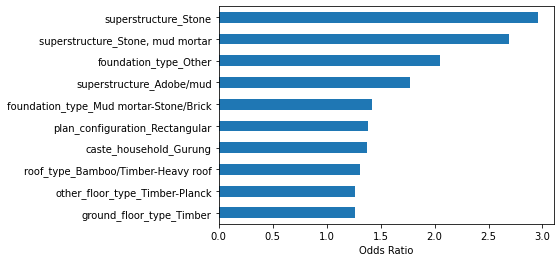

In [24]:
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Odds Ratio");

In [25]:
VimeoVideo("665415581", h="d15477e14d", width=600)

**Task 4.4.16:** Create a horizontal bar chart with the ten smallest coefficients from `feat_imp`. Be sure to label your x-axis `"Odds Ratio"`.

- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts)

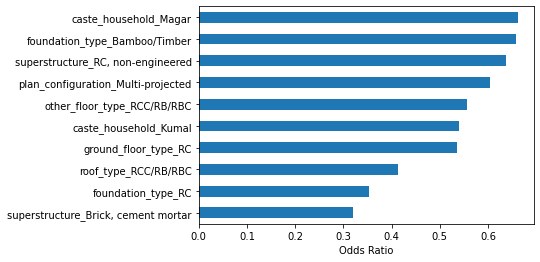

In [26]:
feat_imp.head(10).plot(kind="barh")
plt.xlabel("Odds Ratio");

## Explore Some More

In [27]:
VimeoVideo("665415631", h="90ba264392", width=600)

**Task 4.4.17:** Which municipalities saw the highest proportion of severely damaged buildings? Create a DataFrame `damage_by_vdcmun` by grouping `df` by `"vdcmun_id"` and then calculating the mean of the `"severe_damage"` column. Be sure to sort `damage_by_vdcmun` from highest to lowest proportion.

- [<span id='technique'>Aggregate data using the groupby method in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)

In [32]:
damage_by_vdcmun = (
df.groupby("vdcmun_id")["severe_damage"].mean().sort_values(ascending=False)
).to_frame()
damage_by_vdcmun

,severe_damage
vdcmun_id,
31,0.930199
32,0.851117
35,0.827145
30,0.824201
33,0.782464
34,0.666979
39,0.572344
40,0.512444
38,0.506425


In [33]:
# Check your work
assert isinstance(
    damage_by_vdcmun, pd.DataFrame
), f"`damage_by_vdcmun` should be a Series, not type {type(damage_by_vdcmun)}."
assert damage_by_vdcmun.shape == (
    11,
    1,
), f"`damage_by_vdcmun` should be shape (11,1), not {damage_by_vdcmun.shape}."

In [34]:
VimeoVideo("665415651", h="9b5244dec1", width=600)

**Task 4.4.18:** Create a line plot of `damage_by_vdcmun`. Label your x-axis `"Municipality ID"`, your y-axis `"% of Total Households"`, and give your plot the title `"Household Damage by Municipality"`.

- [Create a line plot in Matplotlib.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

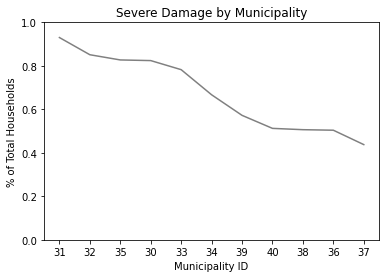

In [42]:
# Plot line
#damage_by_vdcmun.plot(kind="bar")
plt.plot(damage_by_vdcmun.values,color="grey")
plt.xticks(range(len(damage_by_vdcmun)),labels=damage_by_vdcmun.index)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel("Municipality ID")
plt.ylabel("% of Total Households")
plt.title("Severe Damage by Municipality");

Given the plot above, our next question is: How are the Gurung and Kumal populations distributed across these municipalities?

In [43]:
VimeoVideo("665415693", h="fb2e54aa04", width=600)

**Task 4.4.19:** Create a new column in `damage_by_vdcmun` that contains the the proportion of Gurung households in each municipality.

- [<span id='technique'>Aggregate data using the groupby method in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)
- [<span id='technique'>Create a Series in <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)

In [52]:
damage_by_vdcmun["Gurung"] = (
    df[df["caste_household"]=="Gurung"].groupby("vdcmun_id")["severe_damage"].count()
    /df.groupby("vdcmun_id")["severe_damage"].count()
)

In [53]:
damage_by_vdcmun["Gurung"]

vdcmun_id
31    0.326937
32    0.387849
35    0.826889
30    0.338152
33    0.011943
34    0.385084
39    0.097971
40    0.246727
38    0.049023
36    0.143178
37    0.050485
Name: Gurung, dtype: float64

In [51]:
(
    df[df["caste_household"]=="Gurung"].groupby("vdcmun_id")["severe_damage"].count()
    /df.groupby("vdcmun_id")["severe_damage"].count()
)

vdcmun_id
30    0.338152
31    0.326937
32    0.387849
33    0.011943
34    0.385084
35    0.826889
36    0.143178
37    0.050485
38    0.049023
39    0.097971
40    0.246727
Name: severe_damage, dtype: float64

In [54]:
VimeoVideo("665415707", h="9b29c23434", width=600)

**Task 4.4.20:** Create a new column in `damage_by_vdcmun` that contains the the proportion of Kumal households in each municipality. Replace any `NaN` values in the column with `0`.

- [<span id='technique'>Aggregate data using the groupby method in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)
- [<span id='technique'>Create a Series in <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)

In [59]:
damage_by_vdcmun["Kumal"] = (
    df[df["caste_household"]=="Kumal"].groupby("vdcmun_id")["severe_damage"].count()
    /df.groupby("vdcmun_id")["severe_damage"].count()
).fillna(0)

In [61]:
damage_by_vdcmun

,severe_damage,Gurung,Kumal
vdcmun_id,,,
31,0.930199,0.326937,0.000000
32,0.851117,0.387849,0.000000
35,0.827145,0.826889,0.000000
30,0.824201,0.338152,0.000000
33,0.782464,0.011943,0.029478
34,0.666979,0.385084,0.000000
39,0.572344,0.097971,0.000267
40,0.512444,0.246727,0.036973
38,0.506425,0.049023,0.100686


In [62]:
VimeoVideo("665415729", h="8d0712c306", width=600)

**Task 4.4.21:** Create a visualization that combines the line plot of severely damaged households you made above with a stacked bar chart showing the proportion of Gurung and Kumal households in each district. Label your x-axis `"Municipality ID"`, your y-axis `"% of Total Households"`.

- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts)
- [<span id='technique'>Drop a column from a DataFrame using <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

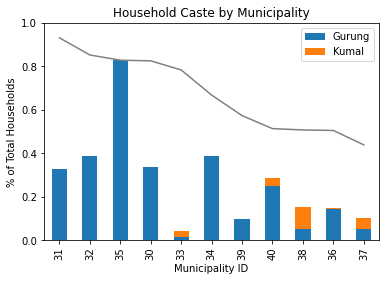

In [65]:
damage_by_vdcmun.drop(columns="severe_damage").plot(kind="bar",stacked=True)

plt.plot(damage_by_vdcmun["severe_damage"].values,color="grey")
plt.xticks(range(len(damage_by_vdcmun)),labels=damage_by_vdcmun.index)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel("Municipality ID")
plt.ylabel("% of Total Households")
plt.title("Household Caste by Municipality")
plt.legend();

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
